In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as integrate

In [3]:
Δx = 2
Δt = 0.1
k = 0.835
λ = k * Δt/Δx**2
variaveis = np.array([0,0,0,0])
contorno = np.array([100,50])
matriz_coeficiente = np.array(
    [[1+2*λ,-λ,0,0],
     [-λ,1+2*λ,-λ,0],
     [0, -λ,1+2*λ,-λ],
     [0,0,-λ,1+2*λ]]
     )

matriz_ampliada = np.array([variaveis[0] + λ*contorno[0],variaveis[1],variaveis[2],variaveis[3] + λ*contorno[1]]).T

In [4]:
for _ in np.arange(0,0.1,Δt):
    variaveis = np.linalg.solve(matriz_coeficiente,matriz_ampliada)
    matriz_ampliada = np.array([variaveis[0] + λ*contorno[0],variaveis[1],variaveis[2],variaveis[3] + λ*contorno[1]]).T

In [5]:
variaveis

array([2.00465303, 0.04058881, 0.02089859, 1.00233862])

Solução analítica

In [6]:
def u(x,t):
    global k
    somatorio = 0
    for n in range(1,1000):
        # print(somatorio)
        somatorio += 100*((-1)**n - 2)/(n * np.pi) * np.sin(n*np.pi*x/10)*np.exp(-k*(n* np.pi/10)**2*t)
    return 100 - 5*x + somatorio


In [7]:
u(2,0.1)

9.87627212651887e-05

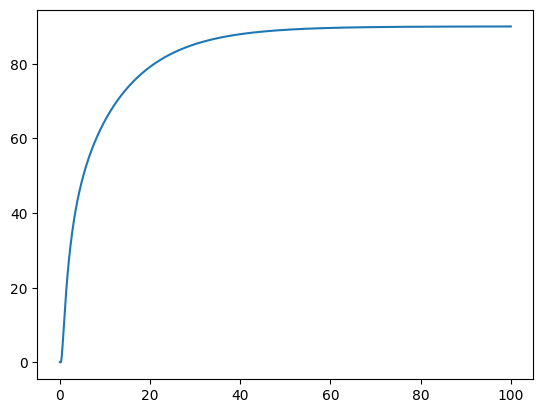

In [10]:
t = np.linspace(0,100,1000)
plt.plot(t,u(2,t))